# How should we aggregate ratings on SWARM?

### Lizzie Silver
### SWARM Lunchtime Talk, 21/11/2017

## Outline:

1. What's wrong with the average?
2. Why we can't have nice things
3. Methods I am testing (and the ones I'm not)
5. How I create fake data
4. How I'm evaluating performance (and how I'm not)
6. Results: what makes a difference (and what doesn't)
7. So ... help me decide already

## Two things we want from rating aggregation

1. Elicit raters' honest opinions
2. Don't give one rater more power than another


## What's wrong with the average?

1. Users give extreme (insincere) scores to "push" an answer up or down
2. Raters who give extreme scores have more influence than raters who give moderate scores

## Alternatives to the average

Extreme scores are a sensible strategy, given the incentives!

How can we remove the incentive to rate dishonestly?

Rank aggregation?

## Why we can't have nice things: the original

Arrow's Impossibility Theorem:

1. **Pareto:** If every voter prefers alternative X over alternative Y, then the group prefers X over Y.
2. **Independence of irrelevant alternatives:** If every voter's preference between X and Y remains unchanged, then the group's preference between X and Y will also remain unchanged (even if voters' preferences between other pairs like X and Z, Y and Z, or Z and W change).
3. **No "dictator":** no single voter possesses the power to always determine the group's preference.
4. **Unrestricted domain:** Voters can express any coherent order of preference.

Arrow showed that we can't have all four at once.

## Why we can't have nice things: the remix

Gibbard-Satterthwaite Theorem:

1. **No "dictator":** no single voter possesses the power to always determine the group's preference.
2. **Three or more options:** Works when you have more than two options being ranked
3. **Strategy-proof:** For all voters, the outcome they get when they vote with their true preferences *P*, is at least as good or better than outcome they would get if they voted with any other ordering *P'*. In other words, no voter can do better by voting dishonestly.

Gibbard and Satterthwaite showed you can't have all three at once.

## Some strategies take more work

"Give extreme scores" is easy and predictable.

If a system fails "independence of irrelevant alternatives", I might be able to reverse the order of *A* and *B* by changing my ranking of *C* and *D* ... or *E* and *F* ...

Space of possible rankings is large:

| # of items | # of partial rankings |
| --- | --- | 
| 2 | 3 |
| 3 | 13 |
| 4 | 75 |
| 5 | 541 |
| 6 | 4683 |
| 7 | 47293 |
| 8 | 545835 |
| 9 | 7087261 | 
| 10 | 102247563 |

## The new goal

1. Don't give one rater more power than another 
2. Make it *hard work* for a rater to rate dishonestly.
    - Hard to see how to game the system
    - Honest preferences should do pretty well


## Methods I am testing:

1. Mean (status quo)
2. RdR Ranking
3. Borda Count
4. User Preferences Ranking
5. Anca Ranking

## Methods I am NOT testing:

1. Use lower bound of confidence interval around the mean (or Bayesian credible interval, etc.)
    - Can still be gamed by giving extreme scores
2. Minimum violation ranking. It's the optimal rank aggregation method (according to Langville & Meyers), but:
    - Complex to implement
    - Non-polynomial runtime
    - Not well suited to partial rankings

## RdR Ranking

1. Rank by average score
2. Move the answers with more than one rating above the answers with only one rating

## Borda Count

Invented by Jean-Charles de Borda in 1770

1. For each rater, take their ranked list of answers, and for each answer on the list, count how many other answers it *outranks*
2. For each answer, sum these counts across all raters

My tweak: give each rating a 1-point boost for being rated at all

Example input:

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|---|
| $u_1$ |  3 |   |   |  5 | 1| 
| $u_2$ |  1 | 4  | 4  |  6 | |
| $u_3$ |  3 |   |  2 |  3 | |
| $u_4$ |  1 | 4  |   |  5 | 1|

Counts matrix:

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|---|
| $u_1$ |  2 |    |    |  3 | 1| 
| $u_2$ |  1 | 2  | 2  |  4 |  |
| $u_3$ |  2 |    |  1 |  2 |  |
| $u_4$ |  1 | 3  |    |  4 | 1|

Final score vector gives a ranking of 4, 1, 2, 3, 5

| $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|
| 6 |  5 |  3 |  13 |  2 | 

## User Preferences Ranking

Described in Ch 10 of _Who's #1?_ by Langville & Meyer

1. For each pair of answers, get a pairwise difference score: 
    1. Take the set of raters who have rated both of them
    2. Sum the "point differences" and divide by the number of raters
2. For each answer, sum its pairwise differences with all the other answers


Example input:

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|---|
| $u_1$ |  3 |   |   | 5 | 1 | 
| $u_2$ |  1 | 4 | 4 | 6 |   |
| $u_3$ |  3 |   | 2 | 3 |   |
| $u_4$ |  1 | 4 |   | 5 | 1 |

Pairwise differences matrix:

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|---|
| $a_1$ | 0   | 3  | 1  |2.75|-1 | 
| $a_2$ |-3   | 0  | 0  |1.5 |-3 |
| $a_3$ |-1   | 0  | 0  |1.5 | 0 |
| $a_4$ |-2.75|-1.5|-1.5| 0  |-4 |
| $a_5$ | 1   | 3  | 0  | 4  | 0 |

Final score vector gives a ranking of 4, 2, 3, 1, 5

| $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|
|-5.75  | 4.5   | -0.5  |  9.75 | -8    | 


## Anca rating:

Like User Preferences, but instead of using the point differences, just use the "win-loss" ratio.


Example input:

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|---|
| $u_1$ |  3 |   |   | 5 | 1 | 
| $u_2$ |  1 | 4 | 4 | 6 |   |
| $u_3$ |  3 |   | 2 | 3 |   |
| $u_4$ |  1 | 4 |   | 5 | 1 |

Pairwise differences matrix:

|  | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|---|
| $a_1$ | 0   | 1  |  0 |0.75|-0.5| 
| $a_2$ |-1   | 0  | 0  |  1 | -1 |
| $a_3$ | 0   | 0  | 0  |  1 |  0 |
| $a_4$ |-0.75| -1 | -1 | 0  | -1 |
| $a_5$ | 0.5 |  1 |  0 |  1 |  0 |

Final score vector gives a ranking of 4, 2, 3, 1, 5

| $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|---|---|---|---|---|
|-1.25  | 1     | -1    |  3.75 | -2.5  | 


## Strategy for evaluation

1. Create fake, semi-realistic ratings data where I know the "true quality" of each answer
2. Run the aggregation functions on the data (Mean, RdR Ranking, Borda Count, User Preferences, and Anca Ranking)
3. Compare the ordering of "true quality" with the ordering produced by the five methods

## How I create fake data

1. Start with $n=30$ fake users. Sample each user's _Ability_ from between 0 and 1
2. Each user writes an answer of a given _Quality_, similar to the user's _Ability_ value
3. Every user rates every answer. 
4. Then I start hiding/removing data.

## Every user rates every answer. 

- Their rating is drawn from a distribution centred on the answer's actual _Quality_. 
- Users with high _Ability_ draw from a narrow distribution; users with low ability draw from a wide distribution. 
- I give each rater an _Easiness_ bias, and shift their ratings up or down based on this

## Then I start hiding/removing data:
1. I remove ratings on the diagonal (you can't rate your own answer)
2. For each user, I draw the number of items they fail to rate, _k_
3. Depending on whether I have set toprated=True, I then either:
    - hide the _k_ lowest scoring ratings for that user
    - pick a random set of _k_ ratings and hide them
4. I designate some random users as "lurkers" and hide the columns representing their answers
5. I designate some random users as "slackers" and hide the rows representing their ratings

## Parameters varied:

- $n = 30$
- _Rating Noise_, which weights how good/bad people are at rating, in [.4, .6]
- _Probability Answer is Unrated_ in [.3, .7]
- _Probability User is a Slacker_ in [.3, .6]
- _Probability User is a Lurker_ = [.5]
- _toprated_ = [True, False]
- _Easiness_ standard deviation in [0.1, 0.5]


## Evaluation metrics

1. Spearman's $\rho$ and Kendall's $\tau$
2. Proportion of the time that the best answer rose to the top

## Note: "strategy" is missing

Do these ranking methods work under strategic voting? 

No easy way to learn this from simulation

## Results


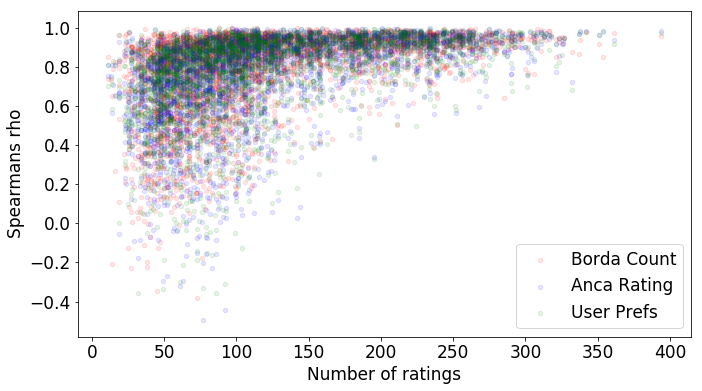

In [40]:
ax = df.plot.scatter(x='numratings', y='borda_rho', color='red', alpha=0.1, label='Borda Count', figsize=(11,6)); df.plot.scatter(x='numratings', y='anca_rho', color='blue', alpha=0.1, label='Anca Rating', ax=ax); df.plot.scatter(x='numratings', y='prefs_rho', color='green', alpha=0.1, label='User Prefs', ax=ax); plt.xlabel('Number of ratings'); plt.ylabel('Spearmans rho')

## Top Rated has a big effect!

In [37]:
plt.rcParams.update({'font.size': 17})
gp3 = df.groupby(['toprated'])[["mean_rho","rdr_rho","borda_rho","prefs_rho","anca_rho" ]]
means = gp3.mean()
errors = gp3.std()

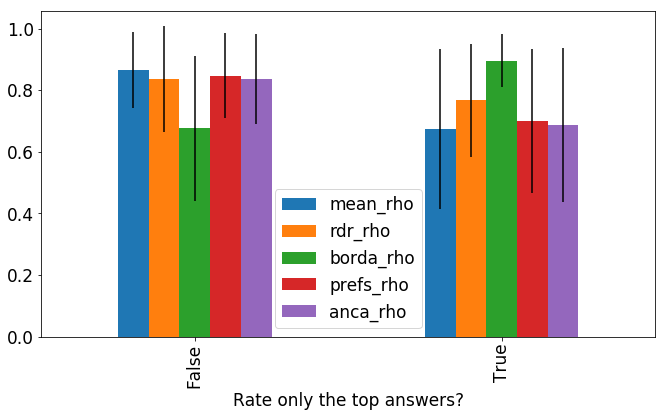

In [38]:
fig, ax = plt.subplots(figsize=(11,6))
means.plot.bar(yerr=errors, ax=ax)
plt.xlabel('Rate only the top answers?')

## Borda count awards points for *being rated*

In [41]:
methods = ["mean", "rdr", "borda", "prefs", "anca"]
all_methods = methods + [a + "_w1.0" for a in methods]
all_methods = [a + "_rho" for a in all_methods]
gp3 = df.groupby(['toprated'])[all_methods]
means = gp3.mean()
errors = gp3.std()

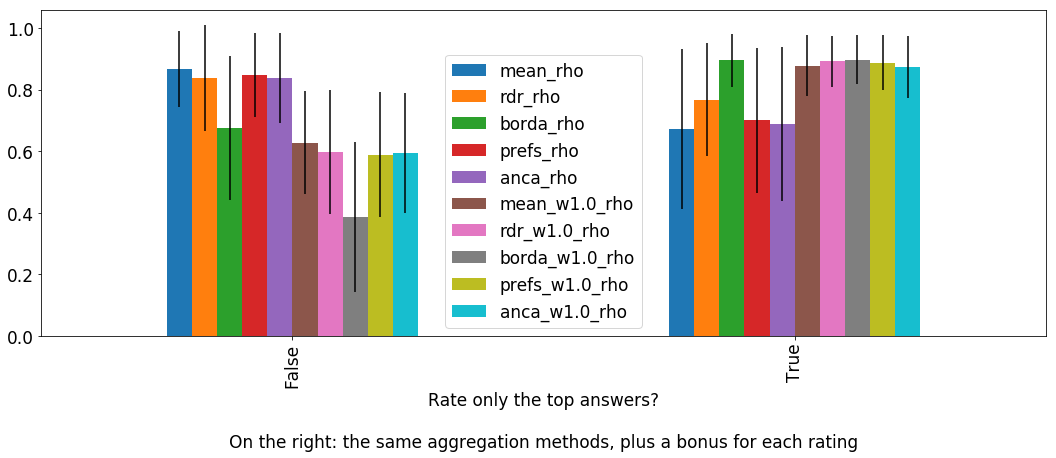

In [42]:
fig, ax = plt.subplots(figsize=(18,6)); means.plot.bar(yerr=errors, ax=ax)
plt.xlabel('Rate only the top answers?\n\nOn the right: the same aggregation methods, plus a bonus for each rating')

## Sparse data hurts a little

In [48]:
gp3 = df.groupby(['pslacker', 'punrated'])[["mean_rho","rdr_rho","borda_rho","prefs_rho","anca_rho" ]]
means = gp3.mean()
errors = gp3.std()

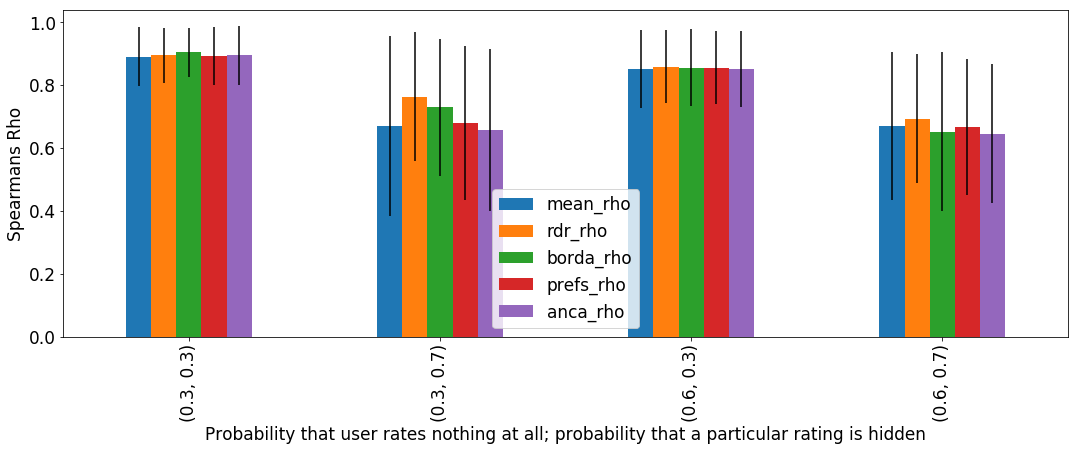

In [52]:
fig, ax = plt.subplots(figsize=(18,6)); means.plot.bar(yerr=errors, ax=ax)
plt.xlabel('Probability that user rates nothing at all; probability that a particular rating is hidden')
plt.ylabel('Spearmans Rho')

## Probability that the best answer comes out on top

In [95]:
gp3 = df.groupby(['pslacker','punrated'])[[ "mean_top1","rdr_top1","borda_top1","prefs_top1","anca_top1" ]]
means = gp3.mean()
errors = gp3.std()


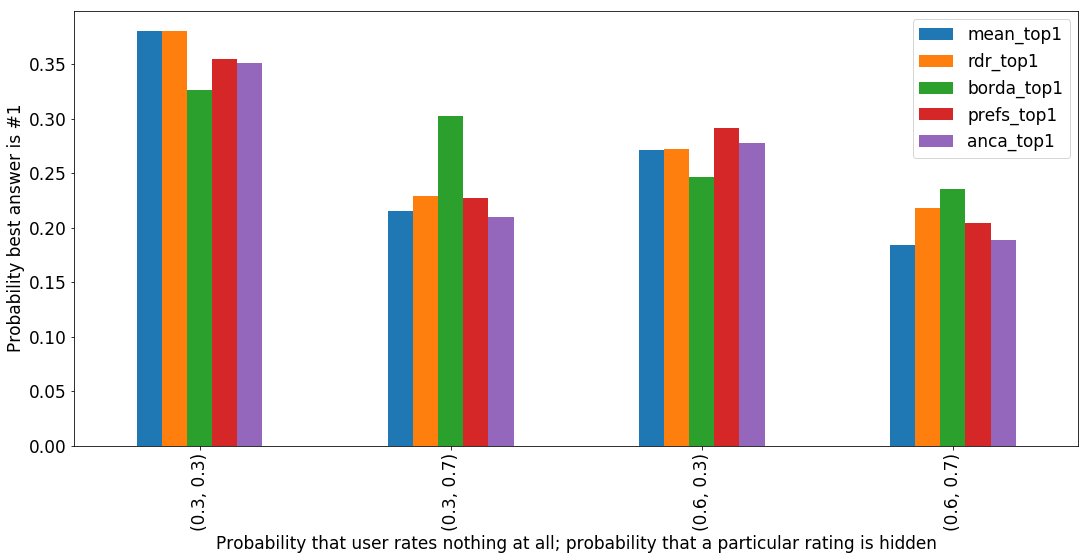

In [96]:
fig, ax = plt.subplots(figsize=(18,8)); means.plot.bar(ax=ax); plt.xlabel('Probability that user rates nothing at all; probability that a particular rating is hidden'); plt.ylabel('Probability best answer is #1')

## Grouping by sparsity *and* toprated

In [98]:
gp3 = df.groupby(['toprated' , 'pslacker','punrated'])[[ "mean_top1","rdr_top1","borda_top1","prefs_top1","anca_top1" ]]
means = gp3.mean()
errors = gp3.std()


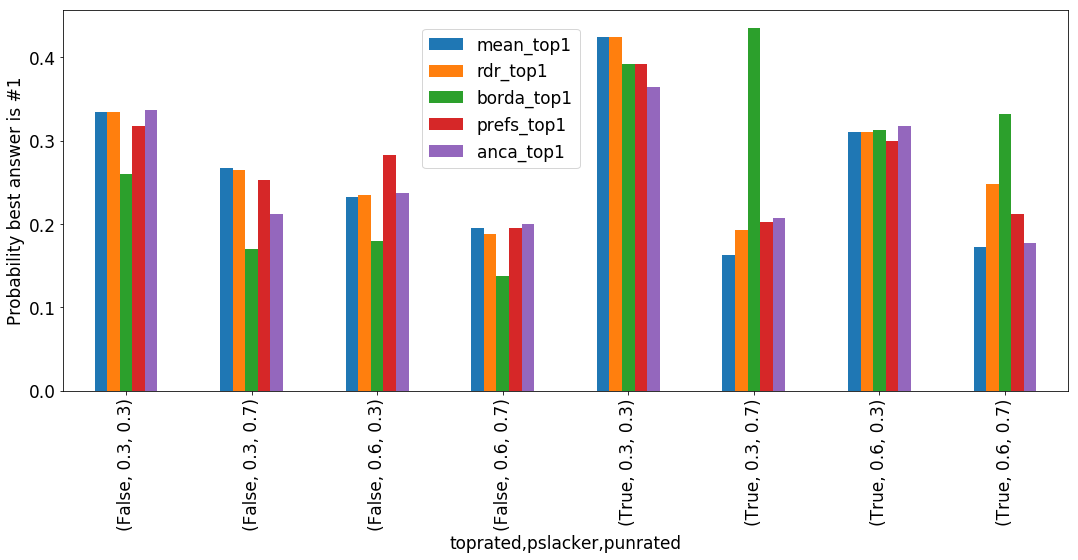

In [99]:
fig, ax = plt.subplots(figsize=(18,7)); means.plot.bar(ax=ax); plt.legend(bbox_to_anchor=(0.53, 0.55), bbox_transform=plt.gcf().transFigure); plt.ylabel('Probability best answer is #1')

0



We want to rank answers so that the best content floats to the top. The information we get is users' ratings of the answers. We must aggregate users' ratings in two ways: 

1. A single user will rate multiple aspects of a single answer (within-rating aggregation)
2. Multiple users rate a given answer (between-rating aggregation)

I'm focusing on the second kind of aggregation. Currently, SWARM just averages the scores.

## Rating honestly vs. strategically

We've noticed that as the deadline approaches, people are giving items more extreme scores (closer to 0 or 100) in order to move the average further, and get the item to the top or bottom of the pile. This is a sensible voting strategy. If I see that an item has a current score of 70 but believe it should have a score of 85, then I should give it a rating of 100 rather than 85, to move it closer to the correct score.

However, this voting strategy causes problems. It means our data on ratings is next to useless - we don't learn users' true opinion of the answer quality. It's also undemocratic. A user who gives an extreme rating has more leverage than a user who gives a rating close to the current average. 

Ideally, SWARM would use an aggregation method that elicits users' honest opinions of the answers, giving helpful feedback to the answer author and helpful data to the analytics team. Ideally we would rank items in a way that doesn't privilege one rater over another.

## Rank aggregation & impossibility theorems

To remove the incentive to gve extreme scores, the obvious solution is to use a rank aggregation method. Each user rates several answers, giving each a score out of 100 (after within-rating aggregation), but we don't need to use the exact numbers. Each rater's list of scores can be coarsened into a rank order of preferences. We can then use a standard method for aggregating ranks rather than real-valued scores.

Unfortunately, the [Gibbard-Satterthwaite Theorem](https://en.wikipedia.org/wiki/Gibbard%E2%80%93Satterthwaite_theorem) shows that rank aggregation methods cannot satisfy our desiderata: all "strategy-proof" methods for ranking more than two options must give all the power to a single rater. 

This might be particularly problematic for SWARM. Many voting systems are _robust_ to strategic voting, because the strategic voter needs lots of information about other voters' preferences. SWARM doesn't tell you exactly how other people are rating, but it lets you _change your own rating_ an arbitrary number of times. Users who wish to vote strategically could try different ratings until they achieve their desired outcome. 

[The space of possible rankings is large](https://en.wikipedia.org/wiki/Ordered_Bell_number), so if there are five or more answers, users cannot explore the space of rankings in a reasonable time. Even exploring a subset would take much more effort than just giving an extreme score. But it is an open question how often users would vote strategically if we aggregated answers like this.

The Gibbard-Satterthwaite Theorem tells us there is no perfect system, but we may be able to find a decent option - a system that produces something close to the ideal ranking in most cases, and which can't be manipulated without spending a lot of time and effort.

## Evaluating performance

The "ideal ranking" is undefined for any of our real examples, but we have some intuitions about which answers are best. I propose testing each rank aggregation method by looking at how it ranks the answers to **past questions** on SWARM Beta. A good method will accord pretty well with our intuitions; a bad one will not. However, this evaluation only gives us information about a small number of cases, and doesn't tell us about robustness to strategies other than "give extreme scores".

We can also evaluate performance using **synthetic data**. We randomly generate answers of varying quality, and sets of ratings that are realistically sparse and noisy. We apply the rank aggregation methods to this data, and see how close the overal ranking comes to the true rank order of the answers based on their quality. 

Because we can sample repeatedly, evaluation on synthetic data tells us about the average case performance of the ranking methods. However, it doesn't tell us about robustness to particular strategies (unless we build those strategies into the rating generation method, which would take a lot of work).

## Ranking Methods

I implement the following ranking methods:

1. Rank of average score (status quo in SWARM)
2. RdR's ranking method ("place everything with more than one rating above everthing with one rating. Within the two groups, rank by average score")
3. [Borda count](https://en.wikipedia.org/wiki/Borda_count) ("For each rater, for each answer, count how many other answers it _outranks_. Then for each answer, sum this count across all raters")
4. User Preference Ranking. This uses the exact score rather than just the rank, but it aggregates pairwise comparisons of items, among the set of users who have rated both items in the pair. It is more robust to sparse ranking. However it is still vulnerable to user manipultion using extreme scores. User Preference Ranking is described in Chapter 10 of _Who's #1?_ by Langville & Meyer.
5. Anca's ranking method: essentially User Preference Ranking, but instead of the exact point difference between two answers, I just ask which one "won" according to that rater. The proportion of wins vs losses, among raters who rated both answers, is the pairwise difference between those two answers. Because it only considers rank differences, Anca's method is not vulnerable to manipulation by giving extreme scores.

All these methods start by creating a rater-by-answer matrix of ratings.

### Methods I am NOT implementing:

Evan Miller's [confidence interval-based method](http://www.evanmiller.org/how-not-to-sort-by-average-rating.html), the [Bayesian version](http://www.evanmiller.org/bayesian-average-ratings.html), the [star-rating version](http://www.evanmiller.org/ranking-items-with-star-ratings.html), and [Paul Masurel's variation](https://fulmicoton.com/posts/bayesian_rating/) take the _uncertainty_ around the average score into account. They rank by the lower bound of a confidence interval or credible interval around the average score, or smooth the average using a pseudocount. Unfortunately these methods are still centered on the mean, so they would still be vulnerable to the strategy of "give extreme scores". Users who give extremely low scores would have more power than before. Furthermore, we are unlikely to ever get enough ratings for the intervals to become narrow.

Minimum Violation Ranking (MVR), as described in Chapter 15 of _Who's #1?_ by Langville & Meyer, would take a set of users' rankings and produce an aggregate ranking that disagrees as little as possible with the input rankings. This method is optimal among all methods that use only rank data (as opposed to, for example, "average score" or "user preference rankings" which use the exact scores rather than just the ranks). It would do as well as or better than Borda count. However, the exact version of MVR requires solving an integer linear program  every time the scores are updated, which can take a long time. Langville & Meyer show you can speed it up by first solving a relaxed version of the problem. 

I chose not to implement MVR because (a) the implementation would be moderately complicated, (b) the runtime might be prohibitive, and (c) it's designed for aggregating complete rankings, not partial rankings. We would first turn the partial rankings into complete rankings by placing all unranked items _last_ in each user's ranking. So if I haven't had time to rate an answer, that is indistinguishable from me saying it is the worst answer. Given how sparse our data is, this is a very common case, so I think MVR would work poorly on our data.


## Data

For evaluating the methods on synthetic data, I have developed a class that pulls the data from a CSV of a synthetic rater-by-answer matrix.


In [1]:
# need this because my python & anaconda installation is all kinds of messed up
import sys
sys.path.append("/Users/lizzie/anaconda/")
sys.path.append("/Users/lizzie/Library/Python/3.6/lib/python/site-packages")


## Define abstract score matrix class

This class implements the ranking methods. It's abstract because the _data_ for a score matrix could either be pulled from the SWARM DB, or generated synthetically, and I want to separate those cases. Those concrete classes are defined below.

In [1]:
import numpy as np
from abc import ABCMeta, abstractmethod

class AbstractScoreMatrix(object):
    """A rater-by-answer matrix of scores for answers to the question.
    
    Includes several ranking methods:
        (a) borda_count()
        (b) user_preferences()
        (c) rdr_rating()
        (d) mean_rating()
        (e) anca_rating()
    All of them return a 1D Numpy array with the *scores* of the answers.
    
    To implement these methods you need a user-by-answer matrix, where each cell contains a  
    single number representing that user's rating of that answer. Ratings are between 0 and 100. 
    
    If the user has not rated an item, I use -1 as the "missing data" value.
    
    This is an abstract class because the instantiation differs depending on where you get the  
    data from (a CSV file, a connection to the SWARM database + a question ID, etc.).
    """ 
    __metaclass__ = ABCMeta
    
    def mean_rating(self):
        """Returns the mean score of each item (i.e. the status quo of the platform)"""
        
        def nonmissing_mean(arr):
            if np.sum(arr >= 0) > 0:
                return np.mean(arr[np.where(arr >= 0)])
            else:
                return 0.0
        
        return np.apply_along_axis(nonmissing_mean, axis=0, arr=self.matrix)
    
    def rdr_rating(self, plugin="mean"):
        """Ranks every item that has at least two ratings above those with one rating or fewer.
        Suggested by RdR. The 'plugin' is the rating scheme used to differentiate within 
        these two groups - by default,it is mean_rating().
        """
        if plugin=="borda":
            score_vec = self.borda_count()
        elif plugin=="user_prefs":
            score_vec = self.user_preferences()
        elif plugin=="mean":
            score_vec = self.mean_rating()
        else:
            raise ValueError('Did not recognize plugin rank method', plugin)
            
        rating_number = np.sum(self.matrix >= 0, axis=0)
        
        # find the max score among items with one or zero ratings. Add that number to all 
        # items with more than one rating.
        if np.sum(rating_number <= 1) > 0:
            addon = np.max(score_vec[np.where(rating_number <= 1)])
            score_vec[np.where(rating_number > 1)] += addon
        
        return score_vec
    
    def borda_count(self, count_zeroes=False):
        """Returns a 1D Numpy array with the Borda count of all answers. 
        
        I modify Borda count slightly by giving a 1-point bonus to items that have a rating 
        (when count_zeroes=False).
        
        Setting count_zeroes=True means that all rated items are considered to rank higher
        than unrated items. For example, if a rater only rated one out of ten answers, 
        that answer would receive nine points (as opposed to one).
        """
        
        def borda(arr, count_zeroes=False):
            res = []
            for v in arr:
                if count_zeroes:
                    res.append(sum(arr < v))
                else:
                    res.append(sum((arr < v) & (arr >= 0)))
            
            # add one to each item that has a score
            return np.array(res) if count_zeroes else np.array(res) + (arr > -1)

        barr = np.apply_along_axis(borda, axis=1, arr=self.matrix, count_zeroes=count_zeroes)
        foo = np.sum(barr, axis=0)
        
        return foo
    
    def get_missing_subset(self):
        """Return a dictionary of the indices of answers that have been scored and answers that  
        haven't (and raters that have provided scores, and raters that havent).
        Used in a preprocessing step in user_preferences(), to get a subset of the score matrix 
        where unrated items have been dropped (and useless raters have been dropped).
        Retaining a list of indices of the dropped items means we can still create an overall  
        ordering of all items (rated and unrated).
        """
        
        subset = {'answers':{'data':np.where(np.logical_not(np.all(self.matrix == -1, 
                                                                   axis=0)))[0], \
                             'missing':np.where(np.all(self.matrix == -1, axis=0))[0]}, \
                  'raters':{'data':np.where(np.logical_not(np.all(self.matrix == -1, 
                                                                  axis=1)))[0], \
                            'missing':np.where(np.all(self.matrix == -1, axis=1))[0]}}
        return subset
    
    def get_subset_matrix(self):
        """Returns a subset of the score matrix that drops all rows and columns that contain 
        no rankings
        """
        
        return self.matrix[self.subset['raters']['data'][:,None], 
                           self.subset['answers']['data']]
    
    def user_preferences(self):
        """calculates rank according to user preference rankings, as detailed in chapter 10 of
        'Who's #1?' by Langville and Meyer. See appendix.
        """
        
        m = len(self.subset["answers"]["data"])
        
        if m < 1:
            raise ValueError("No answers have been rated!")
        
        if len(self.subset["raters"]["data"]) < 1:
            raise ValueError("No users have rated answers!")
            
        if m==1:
            raise ValueError("Only one answer has been rated!")
            
        score_mat = self.get_subset_matrix()
        kmat = np.zeros((m,m))
        
        for i in range(m):
            for j in range(i+1, m):
                foo = np.all((score_mat[:,[i,j]] > 0), axis=1)
                if np.any(foo):
                    sij = np.sum(score_mat[np.where(foo), i]) / sum(foo)
                    sji = np.sum(score_mat[np.where(foo), j]) / sum(foo)
                    kmat[i,j] = sij - sji
                    kmat[j,i] = sji - sij
        
        rvec = np.sum(kmat,axis=1)/m
        
        # normalize, so everything that has received a rating is at least one point higher 
        # than unrated items
        rvec = rvec - np.min(rvec - 1)
        
        # Insert the rated items into a vector containing scores for all items
        all_rvec = np.zeros((len(self.answer_ids)))
        for i in range(len(rvec)):
            all_rvec[self.subset["answers"]["data"][i]] = rvec[i]
            
        return all_rvec

    def anca_rating(self):
        """modified version of user preference rankings, suggested by Anca:
        just use the win-loss ratio, not the exact point differences.
        """
        
        m = len(self.subset["answers"]["data"])
        
        if m < 1:
            raise ValueError("No answers have been rated!")
        
        if len(self.subset["raters"]["data"]) < 1:
            raise ValueError("No users have rated answers!")
            
        if m==1:
            raise ValueError("Only one answer has been rated!")
            
        score_mat = self.get_subset_matrix()
        kmat = np.zeros((m,m))
        
        for i in range(m):
            for j in range(i+1, m):
                foo = np.all((score_mat[:,[i,j]] > 0), axis=1)
                if np.any(foo):
                    sij = np.sum(score_mat[np.where(foo), i] > score_mat[np.where(foo), j]) / sum(foo)
                    sji = np.sum(score_mat[np.where(foo), j] > score_mat[np.where(foo), i]) / sum(foo)
                    kmat[i,j] = sij - sji
                    kmat[j,i] = sji - sij
        
        rvec = np.sum(kmat,axis=1)/m
        
        # normalize, so everything that has received a rating is at least one point higher 
        # than unrated items
        rvec = rvec - np.min(rvec - 1)
        
        # Insert the rated items into a vector containing scores for all items
        all_rvec = np.zeros((len(self.answer_ids)))
        for i in range(len(rvec)):
            all_rvec[self.subset["answers"]["data"][i]] = rvec[i]
            
        return all_rvec
    
    def add_rating_weight(self, svec, weight=1):
        # start by normalizing the score vector so that values are between 0 and 1
        svec = svec - np.min(svec)
        svec = svec / float(np.max(svec))

        # calculate number of ratings per answer and normalize
        rvec = np.sum(self.matrix >= 0, axis=0)
        rvec = rvec - np.min(rvec)
        rvec = rvec / float(np.max(rvec))
        
        # sum weighted vecs
        wvec = svec + (rvec * weight)
        
        return wvec


## Define synthetic score matrix class


In [2]:
import scipy.stats as stats
from scipy.special import expit, logit

class ScoreMatrixSynthetic(AbstractScoreMatrix):
    """Generates a rater-by-answer matrix of scores for answers to the question.
    Note that -1 indicates missing data.
    
    Parameters:
        n: number of users (though not all of them have to contribute)
        rnoise: scaling factor, influences amount of noise in the ratings
        qnoise: RdR suggested this. Because the same people are submitting the answers
            and rating them, we expect a +ve correlation between the skill of the rater and
            the quality of that user's answer. When qnoise is larger, that correlation is
            smaller.
        punrated: the probability that a user will fail to rate an item
        pslacker: the probability that a user will fail to rate any items
        plurker: the probability that a user will fail to submit an answer
        toprated: if True, the user rates the answers they consider best. If False, they 
            rate a random selection of the answers.
        enoise: each rater has an "easiness" bias, i.e. how harsh or easy a rater they are.
            This is drawn from a Gaussian with mean zero, and enoise is its standard dev.
        diag: if True, users are allowed to rate their own answers; if False (the default)
             they can't.
             
    Note that the overall probabilities are different due to interactions between the 
    parameters. E.g. if pslacker=1, then none of the items will be rated, even if punrated=0.
    These are best considered as tuning parameters. Look at the overall number of ratings in
    the output when interpreting results.
    """ 
    
    def __init__(self, n=30, rnoise=0.5, qnoise=0.05, punrated=0.2, 
                 pslacker=.1, plurker=.2, enoise=.5, toprated=True, diag=False, weights=[]):
        self.matrix = self.get_score_matrix(n, rnoise, qnoise, punrated, pslacker, plurker, enoise, toprated, diag)
        self.answer_ids = range(self.matrix.shape[1])
        self.rater_ids = range(self.matrix.shape[0])
        self.subset = self.get_missing_subset()
        self.borda = self.borda_count()
        self.rdr = self.rdr_rating()
        self.anca = self.anca_rating()
        self.mean = self.mean_rating()
        self.prefs = self.user_preferences()
        self.rdr_w = {}
        self.borda_w = {}
        self.anca_w = {}
        self.prefs_w = {}
        self.mean_w = {}
        for w in weights:
            self.rdr_w[w] = self.add_rating_weight(self.rdr, w)
            self.borda_w[w] = self.add_rating_weight(self.borda, w)
            self.anca_w[w] = self.add_rating_weight(self.anca, w)
            self.prefs_w[w] = self.add_rating_weight(self.prefs, w)
            self.mean_w[w] = self.add_rating_weight(self.mean, w)
                
            
        
    def get_score_matrix(self, n=30, rnoise=0.5, qnoise=0.05, punrated=0.2, 
                         pslacker=.1, plurker=.2, enoise=.5, toprated=True, diag=False):
        """produces user-by-answer score matrix (as a 2D Numpy array)"""
        
        # draw from a truncated Gaussian distribution.
        # Note that this is a rejection sampling method, will be VERY SLOW if
        # sigma is large relative to the distance between lower and upper.
        def trunc_gauss(mu=0.5, sigma=1, lower=0, upper=1):
            if mu <= lower or mu >= upper:
                raise ValueError('mu outside bounds', mu, lower, upper)
            
            y = -1
            while y <= lower or y >= upper:
                y = np.random.normal(loc=mu,scale=sigma)
            return y
        
        trunc_gauss_vec = np.vectorize(trunc_gauss)
        
        # draw ability uniformly between 0 and 1
        ability = np.random.random(n)
        # draw each rater's "easiness" value from a gaussian
        easiness = np.random.normal(loc=0, scale=enoise, size=n)
        
        # add (truncated) Gaussian noise to get quality of answers
        quality = trunc_gauss_vec(ability, sigma=qnoise)
        
        # set up ratings matrix
        A = np.empty((n,n), dtype=float)
        for i in range(n):
            # draw all ratings
            ratings_i = trunc_gauss_vec(quality, sigma = (1-ability[i])*rnoise)
            # add easiness bias for this rater
            ratings_i = expit(logit(ratings_i) + easiness[i])
            A[i,:] = ratings_i
            
            # unrated: draw number of unrated answers
            ki = np.random.binomial(n, punrated)
            if toprated:
                # see that rater's top-rated answers
                Aki = np.argsort(A[i,:])[range(ki)]
            else: 
                # see ratings for a random set of answers
                Aki = np.random.choice(n, ki, replace=False)
            # set unrated elements to -1 (missing)
            if len(Aki) > 0:
                A[i, Aki] = -1

        # can't rate your own answers
        if not diag:
            np.fill_diagonal(A,-1)

        # "slackers" are people who don't rate answers
        # pick slackers with probability p, remove their rows from the matrix
        kslack = np.random.binomial(n, pslacker)
        slack = np.random.choice(n, kslack, replace=False)
        A = np.delete(A, slack, 0)

        # "lurkers" are people who don't write answers
        # pick lurkers with probability p, remove their columns from the matrix
        klurk = np.random.binomial(n, plurker)
        lurk = np.random.choice(n, klurk, replace=False)
        A = np.delete(A, lurk, 1)
        self.quality = np.delete(quality, lurk)
        
        return A
    
    
    def kendalltau(self, weight=0):
        if weight == 0:
            borda_tau, borda_p_value = stats.kendalltau(self.quality, self.borda)
            mean_tau, mean_p_value = stats.kendalltau(self.quality, self.mean)
            rdr_tau, rdr_p_value = stats.kendalltau(self.quality, self.rdr)
            prefs_tau, prefs_p_value = stats.kendalltau(self.quality, self.prefs)
            anca_tau, anca_p_value = stats.kendalltau(self.quality, self.anca)
        
        else: 
            borda_tau, borda_p_value = stats.kendalltau(self.quality, self.borda_w[weight])
            mean_tau, mean_p_value = stats.kendalltau(self.quality, self.mean_w[weight])
            rdr_tau, rdr_p_value = stats.kendalltau(self.quality, self.rdr_w[weight])
            prefs_tau, prefs_p_value = stats.kendalltau(self.quality, self.prefs_w[weight])
            anca_tau, anca_p_value = stats.kendalltau(self.quality, self.anca_w[weight])
            
        tau_dict = {"taus":{"borda":borda_tau, "mean":mean_tau, 
                            "rdr":rdr_tau, "prefs":prefs_tau, "anca":anca_tau},
                    "p_values":{"borda":borda_p_value, "mean":mean_p_value, 
                                "rdr":rdr_p_value, "prefs":prefs_p_value, 
                                "anca":anca_p_value}}
        return tau_dict
    
    
    def spearmanrho(self, weight=0.0):
        if weight == 0.0:
            borda_rho, borda_p_value = stats.spearmanr(self.quality, self.borda)
            mean_rho, mean_p_value = stats.spearmanr(self.quality, self.mean)
            rdr_rho, rdr_p_value = stats.spearmanr(self.quality, self.rdr)
            prefs_rho, prefs_p_value = stats.spearmanr(self.quality, self.prefs)
            anca_rho, anca_p_value = stats.spearmanr(self.quality, self.anca)
        
        else:
            borda_rho, borda_p_value = stats.spearmanr(self.quality, self.borda_w[weight])
            mean_rho, mean_p_value = stats.spearmanr(self.quality, self.mean_w[weight])
            rdr_rho, rdr_p_value = stats.spearmanr(self.quality, self.rdr_w[weight])
            prefs_rho, prefs_p_value = stats.spearmanr(self.quality, self.prefs_w[weight])
            anca_rho, anca_p_value = stats.spearmanr(self.quality, self.anca_w[weight])
        
        rho_dict = {"rhos":{"borda":borda_rho, "mean":mean_rho, 
                            "rdr":rdr_rho, "prefs":prefs_rho, "anca":anca_rho},
                    "p_values":{"borda":borda_p_value, "mean":mean_p_value, 
                                "rdr":rdr_p_value, "prefs":prefs_p_value,
                                "anca":anca_p_value}}
        return rho_dict
    
    
    def topn(self, n, weight=0.0):
        """Returns a dict with the proportion of the top n results correctly identified by 
        each ranking method. E.g. if n=3, and in the true quality vector, answers 1, 6 and  
        8 are the top 3, and Borda count identifies answers 1, 5 and 8 as its top 3, then   
        Borda count gets a score of 0.67."""
        
        list_limit = len(self.quality) - 1
        top_n = np.argsort(self.quality)[list_limit-n:list_limit]

        if weight == 0.0:
            borda_top = np.argsort(self.borda)[list_limit-n:list_limit]
            mean_top = np.argsort(self.mean)[list_limit-n:list_limit]
            rdr_top = np.argsort(self.rdr)[list_limit-n:list_limit]
            prefs_top = np.argsort(self.prefs)[list_limit-n:list_limit]
            anca_top = np.argsort(self.anca)[list_limit-n:list_limit]
        else:
            borda_top = np.argsort(self.borda_w[weight])[list_limit-n:list_limit]
            mean_top = np.argsort(self.mean_w[weight])[list_limit-n:list_limit]
            rdr_top = np.argsort(self.rdr_w[weight])[list_limit-n:list_limit]
            prefs_top = np.argsort(self.prefs_w[weight])[list_limit-n:list_limit]
            anca_top = np.argsort(self.anca_w[weight])[list_limit-n:list_limit]
        
        top_dict = {"borda_top" : len(set(top_n).intersection(borda_top)) / float(n),
                     "mean_top" : len(set(top_n).intersection(mean_top)) / float(n),
                     "rdr_top" : len(set(top_n).intersection(rdr_top)) / float(n),
                     "prefs_top" : len(set(top_n).intersection(prefs_top)) / float(n),
                     "anca_top" : len(set(top_n).intersection(anca_top)) / float(n)}
        return top_dict
    
    
    def get_missing_subset(self):
        """Return a dictionary of the indices of answers that have been scored and answers that  
        haven't (and raters that have provided scores, and raters that havent).
        Used in a preprocessing step in user_preferences(), to get a subset of the score matrix 
        where unrated items have been dropped (and useless raters have been dropped).
        Retaining a list of indices of the dropped items means we can still create an overall  
        ordering of all items (rated and unrated).
        """
        
        subset = {'answers':{'data':np.where(np.logical_not(np.all(self.matrix == -1, 
                                                                   axis=0)))[0], \
                             'missing':np.where(np.all(self.matrix == -1, axis=0))[0]}, \
                  'raters':{'data':np.where(np.logical_not(np.all(self.matrix == -1, 
                                                                  axis=1)))[0], \
                            'missing':np.where(np.all(self.matrix == -1, axis=1))[0]}}
        return subset

    
    def display(self, rank_method):
        
        if rank_method=="borda":
            score_vec = self.borda_count()
        elif rank_method=="user_prefs":
            score_vec = self.user_preferences()
        elif rank_method=="mean":
            score_vec = self.mean_rating()
        elif rank_method=="rdr":
            score_vec = self.rdr_rating()
        elif rank_method=="anca":
            score_vec = self.anca_rating()
        else:
            raise ValueError('Did not recognize rank method', rank_method)
        
        ordered_indices = np.flip(np.argsort(score_vec), axis=0)
        i = 0
        round_vec = np.around((score_vec / np.max(score_vec))*100, decimals=1)
        
        return round_vec

    

## Simulation study

I start by generating syntethic data. I vary the following parameters:

* ```rnoise```, a scaling factor that increases the amount of noise in the ratings
* ```punrated```, the probability that a given rating will be hidden
* ```pslacker```, the probability that a user will fail to submit any ratings 
* ```plurker```, the probability that a user will fail to submit an answer
* ```toprated```: if this is True, the user will rate the answers they consider best, and fail to rate the answers they consider worse. 
    * Note: There is no set number of ratings the user completes. The number of ratings for each user, *k*, is drawn from a binomial with probability = ```1 - punrated```. Whether those *k* ratings are then distributed uniformly, or the user rates their *k* top answers, depends on ```toprated```.
* ```enoise```: Each user has an "easiness" bias parameter that is drawn from a Gaussian, reflecting that some users are harsher raters and some are easier. ```enoise``` is the standard deviation of that Gaussian.

In [3]:
import pandas as pd

In [6]:
runs = 100
rnoise = [.4, .6]
punrated = [.3, .7]
pslacker = [.3, .6]
plurker = [.5]
toprated = [True, False]
enoise = [0.1, 0.5]
weights = [0.1, 0.5, 1.0]

numrows = runs * len(rnoise) * len(punrated) * len(pslacker) * len(plurker) * len(enoise) * len(toprated)

methods = ["mean", "borda", "rdr", "prefs", "anca"]
all_methods = methods + [a + "_w" + str(b) for b in weights for a in methods]
outs = ["rho", "tau", "top1", "top2", "top3"]
out_cols = [a + "_" + b for b in outs for a in all_methods]
covariates = ['rnoise', 'punrated', 'pslacker', 'plurker', 'enoise',
              'toprated', 'numraters', 'numanswers', 'numratings', 
              'propnratings']
all_cols = out_cols + covariates

dfe = pd.DataFrame(index=np.arange(0, numrows), 
                  columns=(all_cols) )
j = 0

def get_rho_vec(rhos):
    return [rhos["rhos"][m] for m in methods]

for i in range(runs):
    for rn in rnoise:
        for pu in punrated:
            for ps in pslacker:
                for pl in plurker:
                    for en in enoise:
                        for topr in toprated:
                            test_sm_class = ScoreMatrixSynthetic(n=30, rnoise=rn, qnoise=0.05, 
                                                                 punrated=pu, pslacker=ps, plurker=pl, 
                                                                 enoise=en, toprated=topr, diag=False, 
                                                                 weights=weights)
                            rhos = test_sm_class.spearmanrho()
                            rho_vec = [rhos["rhos"][m] for m in methods] 
                            for w in weights:
                                rhos = test_sm_class.spearmanrho(w)
                                rho_vec = rho_vec + [rhos["rhos"][m] for m in methods]
                            taus = test_sm_class.kendalltau()
                            tau_vec = [taus["taus"][m] for m in methods] 
                            for w in weights:
                                taus = test_sm_class.kendalltau(w)
                                tau_vec = tau_vec + [taus["taus"][m] for m in methods]
                            top1 = test_sm_class.topn(1)
                            top1_vec = [top1[m + "_top"] for m in methods]
                            for w in weights:
                                top1 = test_sm_class.topn(1, w)
                                top1_vec = top1_vec + [top1[m + "_top"] for m in methods]
                            
                            top2 = test_sm_class.topn(2)
                            top2_vec = [top2[m + "_top"] for m in methods]
                            for w in weights:
                                top2 = test_sm_class.topn(2, w)
                                top2_vec = top2_vec + [top2[m + "_top"] for m in methods]
                            
                            top3 = test_sm_class.topn(3)
                            top3_vec = [top3[m + "_top"] for m in methods]
                            for w in weights:
                                top3 = test_sm_class.topn(3, w)
                                top3_vec = top3_vec + [top3[m + "_top"] for m in methods]
                            
                            numraters, numanswers = test_sm_class.matrix.shape
                            numratings = np.sum(test_sm_class.matrix != -1)
                            propratings = numratings / (numraters * numanswers - min(numratings, numanswers))
                            covs = [rn, pu, ps, pl, en, topr, numraters, numanswers, 
                                    numratings, propratings]
                            result_j = rho_vec + tau_vec + top1_vec + top2_vec + top3_vec + covs
                            dfe.loc[j] = result_j

                            j +=1
                            print(j)
                        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [7]:
dfe.head()

,mean_rho,borda_rho,rdr_rho,prefs_rho,anca_rho,mean_w0.1_rho,borda_w0.1_rho,rdr_w0.1_rho,prefs_w0.1_rho,anca_w0.1_rho,...,rnoise,punrated,pslacker,plurker,enoise,toprated,numraters,numanswers,numratings,propnratings
0,0.805986,0.96128,0.805986,0.818369,0.680083,0.867905,0.954592,0.867905,0.880289,0.785346,...,0.4,0.3,0.3,0.5,0.1,True,19,18,208,0.641975
1,0.906863,0.852761,0.906863,0.89951,0.943627,0.931373,0.828431,0.931373,0.904412,0.936275,...,0.4,0.3,0.3,0.5,0.1,False,20,17,227,0.702786
2,0.950549,0.989011,0.950549,0.917582,0.972527,0.972527,0.989011,0.972527,0.917582,0.967033,...,0.4,0.3,0.3,0.5,0.5,True,22,13,181,0.663004
3,0.964835,0.934066,0.964835,0.964835,0.964835,0.969231,0.920879,0.969231,0.969231,0.969231,...,0.4,0.3,0.3,0.5,0.5,False,21,14,206,0.735714
4,0.703297,0.961341,0.901099,0.769231,0.71802,0.89011,0.971115,0.945055,0.873626,0.833563,...,0.4,0.3,0.6,0.5,0.1,True,11,13,88,0.676923


In [8]:
dfe.to_csv("sim_5.csv")


In [4]:
df = pd.read_csv("sim_5.csv", index_col=0)

## Plan for analysis:

* In worst case (high noise, few ratings, etc.), and in best case,
    * Which methods get the top answer right?
    * Which methods have highest Spearman's rho?
* What effect does setting topn=True have?
* What effect does the easiness bias have?

## Plot results

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

### Mean Spearman's Rho

Grouped by the two probabilities controlling how small (```pslacker```) and sparse (```punrated```) the ratings matrix is.

The five methods' performance is pretty similar, within each condition.

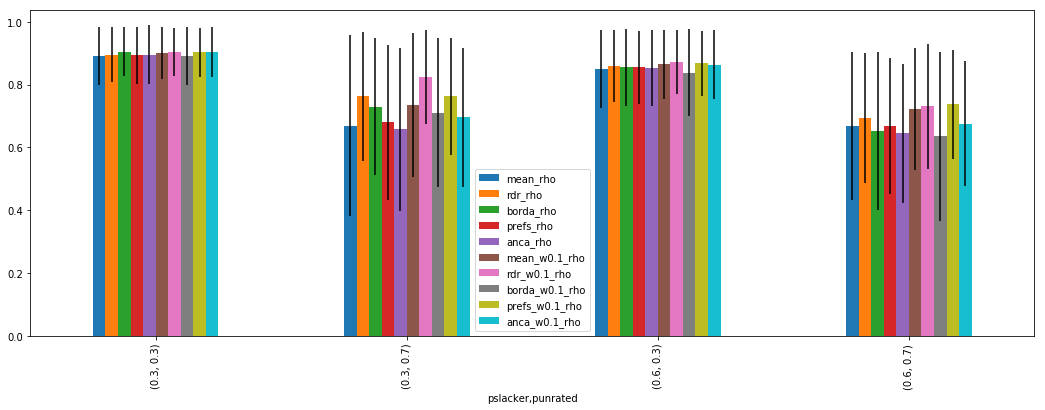

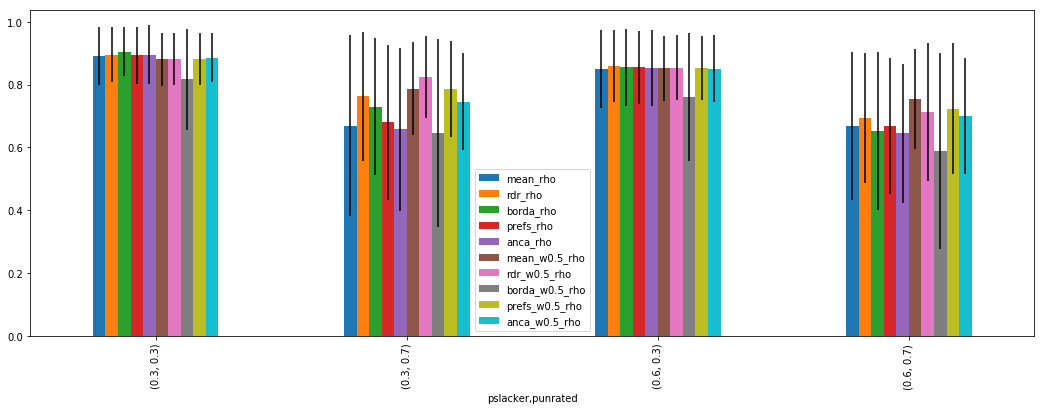

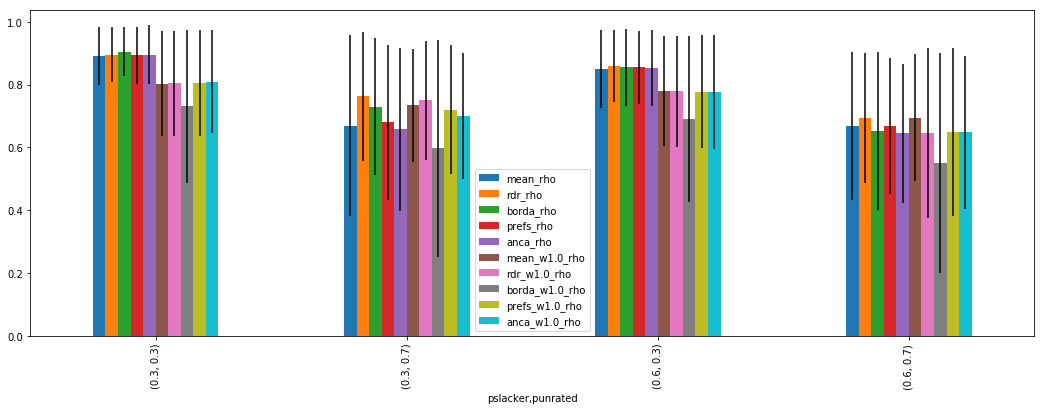

In [11]:
weights = [0.1, 0.5, 1.0]
methods = ["mean", "rdr", "borda", "prefs", "anca"]
for w in weights:
    all_methods = methods + [a + "_w" + str(w) for a in methods]
    all_methods = [a + "_rho" for a in all_methods]
    gp3 = df.groupby(['pslacker','punrated' ])[all_methods]
    means = gp3.mean()
    errors = gp3.std()
    fig, ax = plt.subplots(figsize=(18,6))
    means.plot.bar(yerr=errors, ax=ax)

### Size of easiness bias has little if any effect

In [73]:
gp3 = df.groupby(['enoise'])[["mean_rho","rdr_rho","borda_rho","prefs_rho","anca_rho" ]]
means = gp3.mean()
errors = gp3.std()


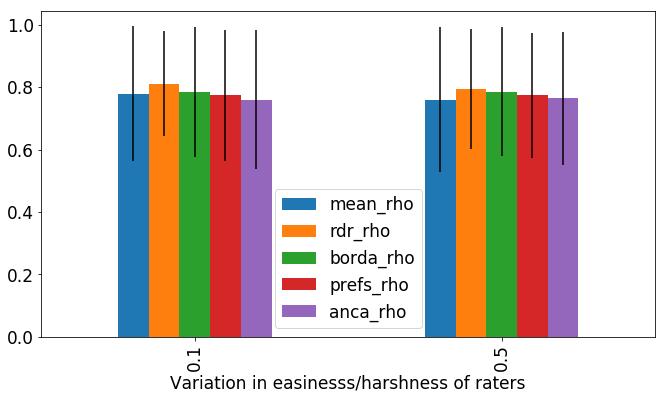

In [76]:
fig, ax = plt.subplots(figsize=(11,6)); means.plot.bar(yerr=errors, ax=ax); plt.xlabel('Variation in easinesss/harshness of raters')

## When people are worse at rating, the aggregation methods do a little worse

In [28]:
gp3 = df.groupby(['rnoise'])[["mean_rho","rdr_rho","borda_rho","prefs_rho","anca_rho" ]]
means = gp3.mean()
errors = gp3.std()


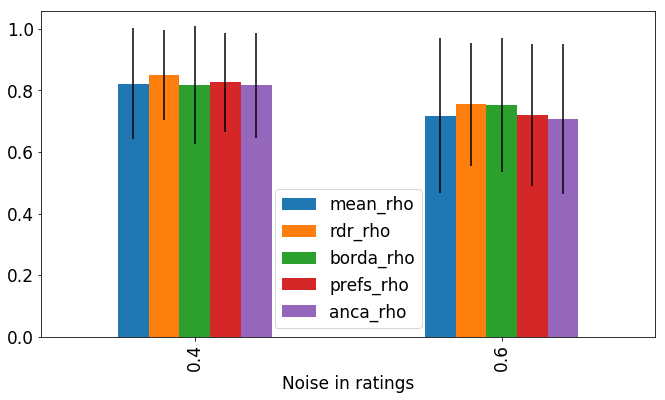

In [30]:
fig, ax = plt.subplots(figsize=(11,6)); means.plot.bar(yerr=errors, ax=ax); plt.xlabel('Noise in ratings')

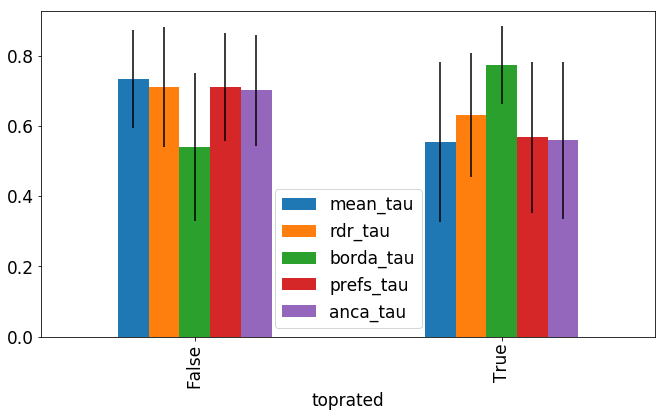

In [17]:
plt.rcParams.update({'font.size': 17})
gp3 = df.groupby(['toprated'])[["mean_tau","rdr_tau","borda_tau","prefs_tau","anca_tau" ]]
means = gp3.mean()
errors = gp3.std()
fig, ax = plt.subplots(figsize=(11,6))
means.plot.bar(yerr=errors, ax=ax)

### Kendall's tau

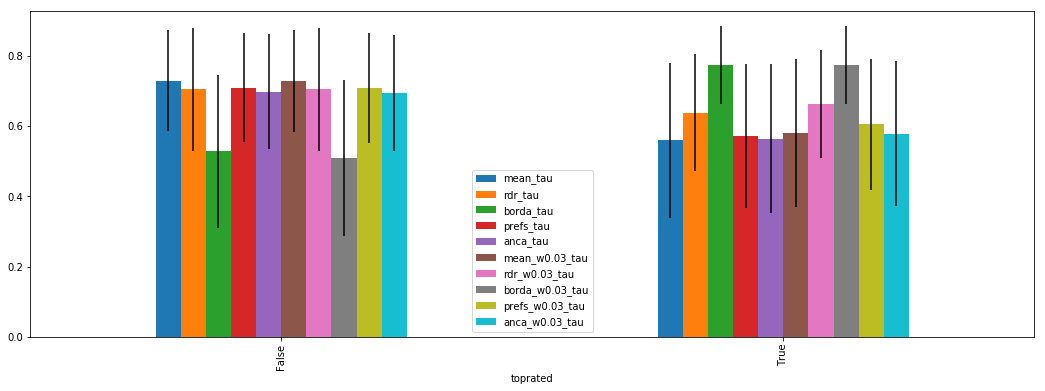

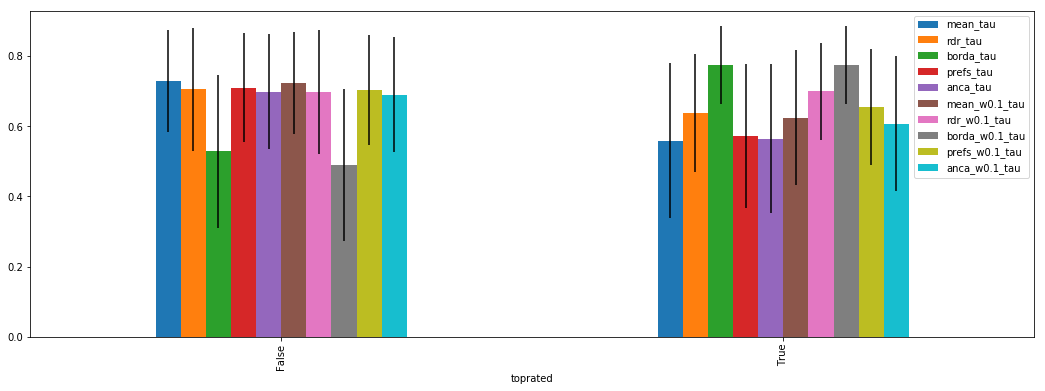

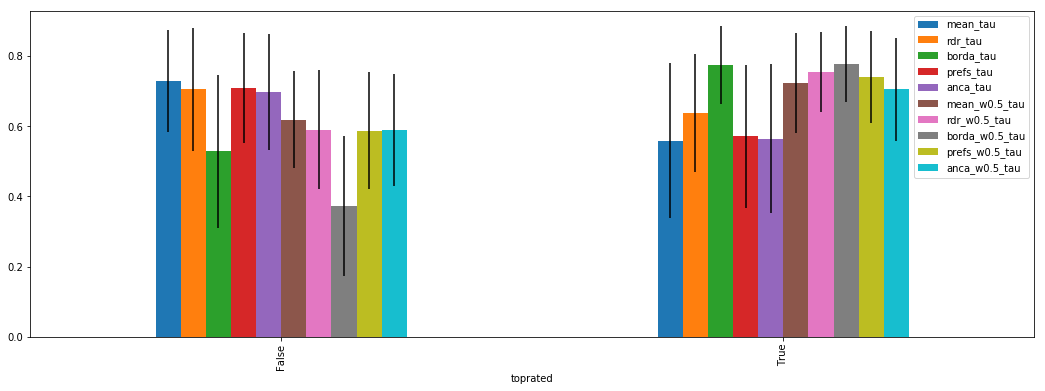

In [66]:
weights = [0.03, 0.1, 0.5]
methods = ["mean", "rdr", "borda", "prefs", "anca"]
for w in weights:
    all_methods = methods + [a + "_w" + str(w) for a in methods]
    all_methods = [a + "_tau" for a in all_methods]
    gp3 = df.groupby(['toprated'])[all_methods]
    means = gp3.mean()
    errors = gp3.std()
    fig, ax = plt.subplots(figsize=(18,6))
    means.plot.bar(yerr=errors, ax=ax)


### How often the top-rated item was the best item

grouped by whether people were rating the top answers or a random selection

Again, Borda count performance depends heavily on whether people rate the top items or not.

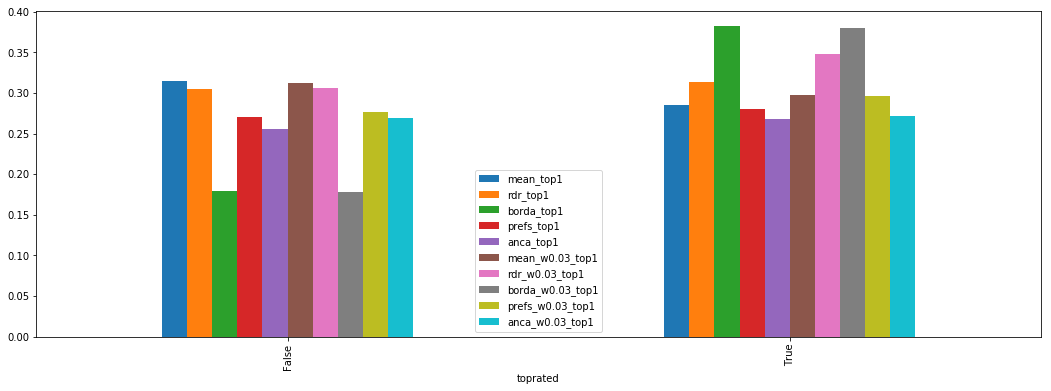

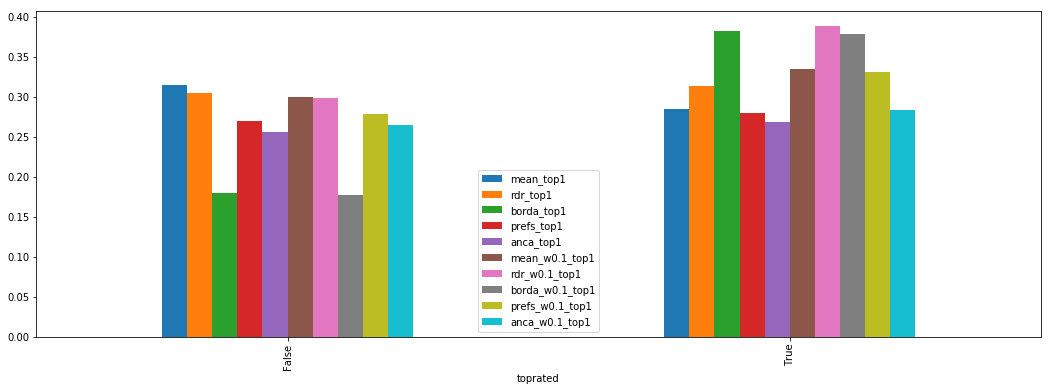

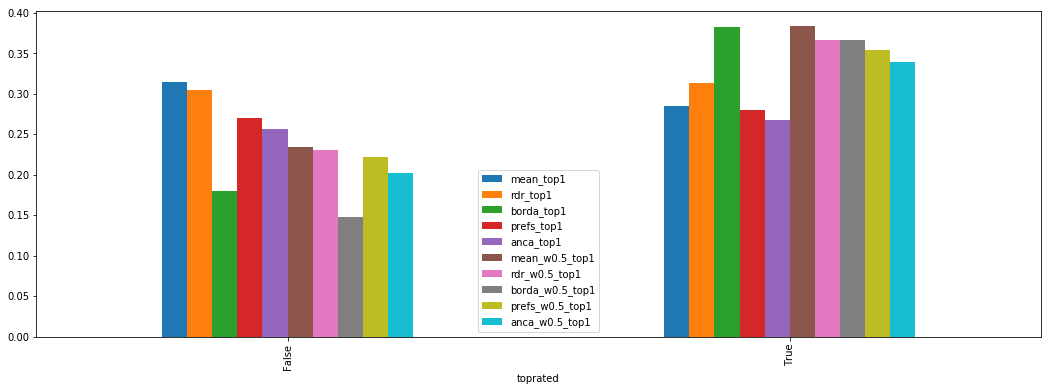

In [68]:
weights = [0.03, 0.1, 0.5]
methods = ["mean", "rdr", "borda", "prefs", "anca"]
for w in weights:
    all_methods = methods + [a + "_w" + str(w) for a in methods]
    all_methods = [a + "_top1" for a in all_methods]
    gp3 = df.groupby(['toprated'])[all_methods]
    means = gp3.mean()
    fig, ax = plt.subplots(figsize=(18,6))
    means.plot.bar( ax=ax)

### Now, grouped by the sparsity parameters

For some reason, Borda count is insensitive to sparsity; it only cares how many rows are in the matrix. The other methods are less sensitive to the size of the matrix but more sensitive to sparsity.

# Conclusion

The five methods have broadly similar performance: they do well when there's a lot of data, and poorly when there's not much data. You lose a little accuracy when you move from Mean to Prefs or Anca rating, but not much. 

The choice of method, then, should be based on two things:

1. How manipulable the method is, and
2. Whether we think people will rate all and only their top answers.

The two least manipulable methods are Borda count and Anca's ranking method. They are resistant to the strategy of giving extreme scores because they use only rank differences. Both of them give more power to users who rank more items, providing an incentive for raters to rate more.

Borda count outperforms everything if users rate their top items. However, if they rate a random selection of items, Borda count underperforms dramatically.

# Appendix: notes to self

### Random exploration: number of ratings vs. speaman's rho

## User preference ranking

In Chapter 10 of _Who's #1?_, Langville & Meyer describe a ranking method for _products_ (analogous to answers on SWARM) that have been rated by users according to a star rating scale - that is, given an integer score between 1 and 5. 

### Formulation:

If there are $m$ users and $n$ products, the ratings can be turned into an $m$-by-$n$ user-by-product matrix. 

$$\mathbf{A} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$$

For example:

|  | $p_1$ | $p_2$ | $p_3$ | $p_4$ | 
|---|---|---|---|---|
| $u_1$ |  3 |   |   |  5 | 
| $u_2$ |   | 2  | 2  |  4 | 
| $u_3$ |  3 |   |  3 |   | 
| $u_4$ |  1 | 4  |   |  5 | 
| $u_5$ |   |  5 |  2 |   | 
| $u_6$ |   |   |  1 |  3 | | 

Note that the ratings are _sparse_ - users do not have to rate all products.

Langville & Meyer begin (page 118) by defining an $n$-b-$n$ skew-symmetric matrix, $\mathbf{K}$, which holds the pairwise differences between the the products:

$$\mathbf{K} =
 \begin{pmatrix}
  0 & k_{1,2} & \cdots & k_{1,n} \\
  k_{2,1} & 0 & \cdots & k_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  k_{n,1} & k_{n,2} & \cdots & 0
 \end{pmatrix}$$

Then (page 128) they define the $k_{i,j}$ terms for this application:

$$k_{i,j} = -k_{j,i} = \begin{cases}
\frac{1}{n_{i,j}} \sum_{u \in U_i \cap U_j} a_{u,i} - a_{u,j} & \mbox{ if } n_{i,j} \neq 0\\
0 & \mbox{ if } n_{i,j} = 0
\end{cases}$$

where $U_i$ is the set of users who have rated product $p_i$, so $\{u: u \in U_i \cap U_j\}$ is the set of users who have rated both products $p_i$ and $p_j$, and $n_{i,j}$ is the number of users in $\{u: u \in U_i \cap U_j\}$.

Once we have $\mathbf{K}$, finding the overall rating vector $\mathbf{r}$ is simple. Simply take the row means - that is,

$$\mathbf{r} = \frac{\mathbf{Ke}}{n}$$

where $\mathbf{e}$ is a vector of ones.

### Properties

 - User preference ranking is based on pairwise comparisons between items.
 - It automatically takes into account that some people are "easy graders" - the absolute values of their ratings doesn't matter, only the _difference_ in the scores between pairs of items they have rated.
 - Users must rate at least two items for their ratings to affect the ranking.
 - Users influence pairwise comparisons whenever they rate both items in the pair. Call the "power" of a user the number of distinct pairs of items they have rated. If the user has rated $k$ items, their power is $\frac{k^2 - k}{2}$.
 - User preferences are vulnerable to users voting strategically like so: give an extremely high score to _one_ item, and extremely low scores to several other items. 

## Why does the "get_missing_subset" method exist?

- User preference ranking can give things a negative score - the mean score is zero! And unrated items have a score of zero by default.
- So I need some way to screen out the answers that haven't been rated AT ALL.
- but that means keeping track of the indices of answers in the ranked and unranked subsets, keeping track of the number of ranked answers (for iterating), etc.
- And maybe I should make it general - so it applies to Borda count as well.